FROM: https://gist.github.com/ShawnHymel/79237fe6aee5a3653c497d879f746c0c
See: https://www.digikey.in/en/maker/projects/intro-to-tinyml-part-1-training-a-model-for-arduino-in-tensorflow/8f1fc8c0b83d417ab521c48864d2a8ec
Generate a TensorFlow model that predicts values in a sinewave. Based on the code by Pete Warden at https://github.com/tensorflow/tensorflow/blob/master/tensorflow/lite/micro/examples/hello_world/create_sine_model.ipynb

In [2]:
%tensorflow_version 2.1

UsageError: Line magic function `%tensorflow_version` not found.


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers

In [5]:
# Print versions
!python3 --versions
print('Numpy ' + np.__version__)
print('TensorFlow ' + tf.__version__)
print('Keras ' + tf.keras.__version__)

unknown option --versions
usage: /usr/local/bin/python3 [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.
Numpy 1.22.4
TensorFlow 2.9.1
Keras 2.9.0


In [6]:
# Settings
nsamples = 1000     # Number of samples to use as a dataset
val_ratio = 0.2     # Percentage of samples that should be held for validation set
test_ratio = 0.2    # Percentage of samples that should be held for test set
tflite_model_name = 'sine_model'  # Will be given .tflite suffix
c_model_name = 'sine_model'       # Will be given .h suffix

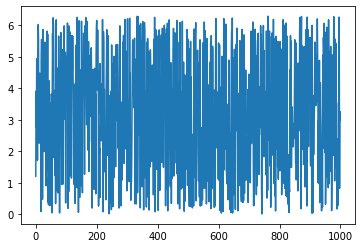

In [7]:
# Generate some random samples
np.random.seed(1234)
x_values = np.random.uniform(low=0, high=(2 * math.pi), size=nsamples)
plt.plot(x_values)

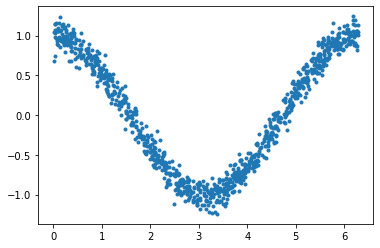

In [39]:
# Create a noisy sinewave with these values
# y_values = np.sin(x_values) + (0.1 * np.random.randn(x_values.shape[0]))
y_values = np.cos(x_values) + (0.1 * np.random.randn(x_values.shape[0]))
plt.plot(x_values, y_values, '.')

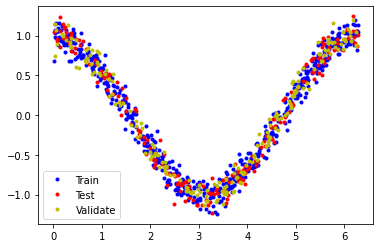

In [40]:
# Split the dataset into training, validation, and test sets
val_split = int(val_ratio * nsamples)
test_split = int(val_split + (test_ratio * nsamples))
x_val, x_test, x_train = np.split(x_values, [val_split, test_split])
y_val, y_test, y_train = np.split(y_values, [val_split, test_split])

# Check that our splits add up correctly
assert(x_train.size + x_val.size + x_test.size) == nsamples

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_val, y_val, 'y.', label="Validate")
plt.legend()
plt.show()

In [41]:
# Create a model
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))

In [42]:
# View model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                32        
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Add optimizer, loss function, and metrics to model and compile it
model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])

In [44]:
# Train model
history = model.fit(x_train,
                    y_train,
                    epochs=500,
                    batch_size=100,
                    validation_data=(x_val, y_val))

Epoch 1/500
6/6 [==============================] - 0s 20ms/step - loss: 1.0130 - mae: 1.0130 - val_loss: 0.8802 - val_mae: 0.8802
Epoch 2/500
6/6 [==============================] - 0s 5ms/step - loss: 0.7817 - mae: 0.7817 - val_loss: 0.7383 - val_mae: 0.7383
Epoch 3/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6998 - mae: 0.6998 - val_loss: 0.6956 - val_mae: 0.6956
Epoch 4/500
6/6 [==============================] - 0s 5ms/step - loss: 0.6674 - mae: 0.6674 - val_loss: 0.6678 - val_mae: 0.6678
Epoch 5/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6498 - mae: 0.6498 - val_loss: 0.6492 - val_mae: 0.6492
Epoch 6/500
6/6 [==============================] - 0s 5ms/step - loss: 0.6399 - mae: 0.6399 - val_loss: 0.6384 - val_mae: 0.6384
Epoch 7/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6330 - mae: 0.6330 - val_loss: 0.6304 - val_mae: 0.6304
Epoch 8/500
6/6 [==============================] - 0s 5ms/step - loss: 0.6279 - mae: 0.6279 - va

6/6 [==============================] - 0s 3ms/step - loss: 0.1968 - mae: 0.1968 - val_loss: 0.2065 - val_mae: 0.2065
Epoch 65/500
6/6 [==============================] - 0s 4ms/step - loss: 0.1933 - mae: 0.1933 - val_loss: 0.1986 - val_mae: 0.1986
Epoch 66/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1852 - mae: 0.1852 - val_loss: 0.1955 - val_mae: 0.1955
Epoch 67/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1833 - mae: 0.1833 - val_loss: 0.1868 - val_mae: 0.1868
Epoch 68/500
6/6 [==============================] - 0s 4ms/step - loss: 0.1745 - mae: 0.1745 - val_loss: 0.1825 - val_mae: 0.1825
Epoch 69/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1720 - mae: 0.1720 - val_loss: 0.1758 - val_mae: 0.1758
Epoch 70/500
6/6 [==============================] - 0s 4ms/step - loss: 0.1655 - mae: 0.1655 - val_loss: 0.1708 - val_mae: 0.1708
Epoch 71/500
6/6 [==============================] - 0s 5ms/step - loss: 0.1629 - mae: 0.1629 - val_loss

Epoch 127/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0936 - mae: 0.0936 - val_loss: 0.0902 - val_mae: 0.0902
Epoch 128/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0994 - mae: 0.0994 - val_loss: 0.0902 - val_mae: 0.0902
Epoch 129/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0973 - mae: 0.0973 - val_loss: 0.0897 - val_mae: 0.0897
Epoch 130/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0963 - mae: 0.0963 - val_loss: 0.0898 - val_mae: 0.0898
Epoch 131/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0939 - mae: 0.0939 - val_loss: 0.1003 - val_mae: 0.1003
Epoch 132/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0960 - mae: 0.0960 - val_loss: 0.0908 - val_mae: 0.0908
Epoch 133/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0920 - mae: 0.0920 - val_loss: 0.0972 - val_mae: 0.0972
Epoch 134/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0930 - m

6/6 [==============================] - 0s 4ms/step - loss: 0.0908 - mae: 0.0908 - val_loss: 0.0880 - val_mae: 0.0880
Epoch 190/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0912 - mae: 0.0912 - val_loss: 0.0903 - val_mae: 0.0903
Epoch 191/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0968 - mae: 0.0968 - val_loss: 0.0883 - val_mae: 0.0883
Epoch 192/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0911 - mae: 0.0911 - val_loss: 0.0915 - val_mae: 0.0915
Epoch 193/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0932 - mae: 0.0932 - val_loss: 0.0895 - val_mae: 0.0895
Epoch 194/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0930 - mae: 0.0930 - val_loss: 0.0994 - val_mae: 0.0994
Epoch 195/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0937 - mae: 0.0937 - val_loss: 0.0929 - val_mae: 0.0929
Epoch 196/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0959 - mae: 0.0959 - v

6/6 [==============================] - 0s 4ms/step - loss: 0.0953 - mae: 0.0953 - val_loss: 0.1081 - val_mae: 0.1081
Epoch 252/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0932 - mae: 0.0932 - val_loss: 0.0879 - val_mae: 0.0879
Epoch 253/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0899 - mae: 0.0899 - val_loss: 0.0887 - val_mae: 0.0887
Epoch 254/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0896 - mae: 0.0896 - val_loss: 0.0889 - val_mae: 0.0889
Epoch 255/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0991 - mae: 0.0991 - val_loss: 0.0878 - val_mae: 0.0878
Epoch 256/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0956 - mae: 0.0956 - val_loss: 0.0926 - val_mae: 0.0926
Epoch 257/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0888 - mae: 0.0888 - val_loss: 0.0885 - val_mae: 0.0885
Epoch 258/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0953 - mae: 0.0953 - v

6/6 [==============================] - 0s 4ms/step - loss: 0.0886 - mae: 0.0886 - val_loss: 0.0894 - val_mae: 0.0894
Epoch 314/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0923 - mae: 0.0923 - val_loss: 0.0961 - val_mae: 0.0961
Epoch 315/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0933 - mae: 0.0933 - val_loss: 0.0879 - val_mae: 0.0879
Epoch 316/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0952 - mae: 0.0952 - val_loss: 0.0973 - val_mae: 0.0973
Epoch 317/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0932 - mae: 0.0932 - val_loss: 0.0974 - val_mae: 0.0974
Epoch 318/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0886 - mae: 0.0886 - val_loss: 0.0908 - val_mae: 0.0908
Epoch 319/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0942 - mae: 0.0942 - val_loss: 0.0895 - val_mae: 0.0895
Epoch 320/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0929 - mae: 0.0929 - v

6/6 [==============================] - 0s 4ms/step - loss: 0.0932 - mae: 0.0932 - val_loss: 0.1032 - val_mae: 0.1032
Epoch 376/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0957 - mae: 0.0957 - val_loss: 0.0884 - val_mae: 0.0884
Epoch 377/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0907 - mae: 0.0907 - val_loss: 0.0887 - val_mae: 0.0887
Epoch 378/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0948 - mae: 0.0948 - val_loss: 0.1009 - val_mae: 0.1009
Epoch 379/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0936 - mae: 0.0936 - val_loss: 0.0900 - val_mae: 0.0900
Epoch 380/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0951 - mae: 0.0951 - val_loss: 0.0993 - val_mae: 0.0993
Epoch 381/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0910 - mae: 0.0910 - val_loss: 0.0892 - val_mae: 0.0892
Epoch 382/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0918 - mae: 0.0918 - v

6/6 [==============================] - 0s 4ms/step - loss: 0.0975 - mae: 0.0975 - val_loss: 0.0899 - val_mae: 0.0899
Epoch 438/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0901 - mae: 0.0901 - val_loss: 0.1008 - val_mae: 0.1008
Epoch 439/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0943 - mae: 0.0943 - val_loss: 0.0956 - val_mae: 0.0956
Epoch 440/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0908 - mae: 0.0908 - val_loss: 0.0918 - val_mae: 0.0918
Epoch 441/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0939 - mae: 0.0939 - val_loss: 0.1011 - val_mae: 0.1011
Epoch 442/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0912 - mae: 0.0912 - val_loss: 0.0885 - val_mae: 0.0885
Epoch 443/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0932 - mae: 0.0932 - val_loss: 0.0934 - val_mae: 0.0934
Epoch 444/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0902 - mae: 0.0902 - v

6/6 [==============================] - 0s 3ms/step - loss: 0.0935 - mae: 0.0935 - val_loss: 0.0998 - val_mae: 0.0998
Epoch 500/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0924 - mae: 0.0924 - val_loss: 0.0902 - val_mae: 0.0902


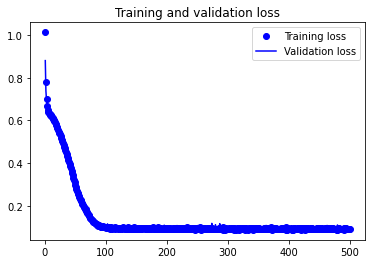

In [45]:
# Plot the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

7/7 [==============================] - 0s 1ms/step


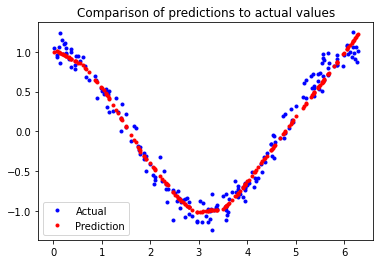

In [46]:
# Plot predictions against actual values
predictions = model.predict(x_test)

plt.clf()
plt.title("Comparison of predictions to actual values")
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Prediction')
plt.legend()
plt.show()

In [18]:
# Convert Keras model to a tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/zh/xm9064gn6wv9qxykklwg1vdm0000gn/T/tmpsfuzij0k/assets


INFO:tensorflow:Assets written to: /var/folders/zh/xm9064gn6wv9qxykklwg1vdm0000gn/T/tmpsfuzij0k/assets
2022-06-17 14:14:01.057888: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-06-17 14:14:01.057908: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-06-17 14:14:01.058884: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/zh/xm9064gn6wv9qxykklwg1vdm0000gn/T/tmpsfuzij0k
2022-06-17 14:14:01.060044: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-06-17 14:14:01.060061: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /var/folders/zh/xm9064gn6wv9qxykklwg1vdm0000gn/T/tmpsfuzij0k
2022-06-17 14:14:01.063387: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-06-17 14:14:01.064187: I tensorflow/cc/saved_model/load

3116

In [19]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str

In [20]:
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))